### B-Spline

O B-Spline (ou *basis spline*) é um método de aproximação/interpolação de curva baseado nos coeficientes dados.

Ele recebe os seguintes parâmetros:

- t &mdash; Um array de nós (os pontos de controle, conhecidos, nos quais o spline deverá se aproximar, ou passar através no caso de interpolação).

- c &mdash; Os coeficientes do spline (os splines são representados matematicamente por equações polinomiais entre os nós. Os coeficientes são os valores desses polinômios que, quando combinados, fornecem a equação completa do spline).

- k &mdash; O grau do spline (o grau dos polinômios que passam entre os nós).

---

#### Importando as bibliotecas

In [1]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import random

#### Dados de interpolação

In [2]:
qtd_dados = 10
y = [random.randint(5, 10) for _ in range(qtd_dados)]
x = range(qtd_dados)
print([(x[i], y[i]) for i in range(qtd_dados)])

[(0, 8), (1, 8), (2, 10), (3, 9), (4, 8), (5, 9), (6, 10), (7, 10), (8, 9), (9, 6)]


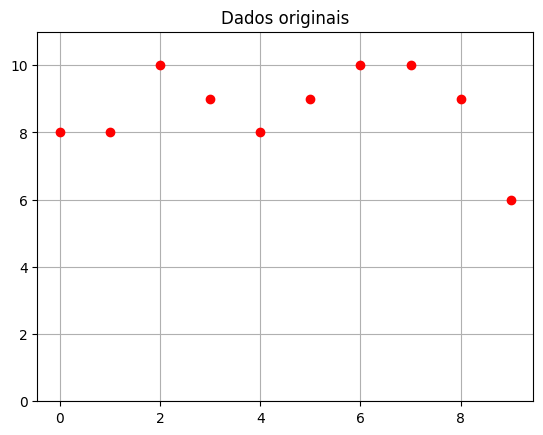

In [3]:
plt.plot(x, y, 'ro')
plt.ylim((0, 11))
plt.title('Dados originais')
plt.grid()
plt.show()

#### Interpolação Linear

A interpolação linear nada mais é do que traçar uma reta entre cada ponto de dado.

Não é adequada para aproximar ou interpolar a maioria das situações reais pois os dados estimados ficam muito "artificiais".

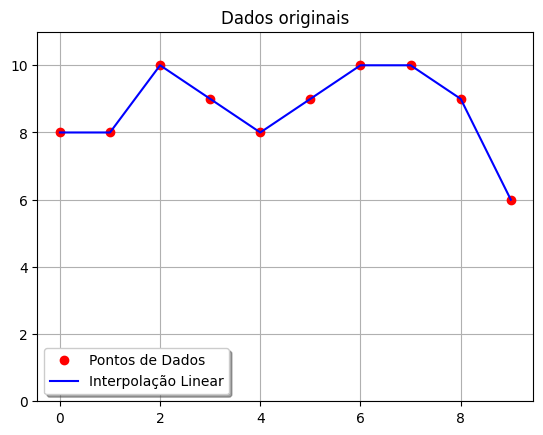

In [4]:
plt.plot(x, y, 'ro', label='Pontos de Dados')
plt.plot(x, y, 'b', label='Interpolação Linear')
plt.ylim((0, 11))
plt.title('Dados originais')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

#### Criando o B-Spline

Para gerar o B-Spline que interpolará os dados, precisamos fornecer os coeficientes dos polinômios do spline.

Para isto usaremos a função [splrep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html) do scipy.interpolate, que retorna:

- **t** (os pontos de controles &ndash; ou *nós*);

- **c** (os coeficientes do spline); e 

- **k** (o grau dos polinômios).

O parâmetro de entrada **s** é o grau de suavidade (*smoothing*) da curva. Quando não são dados pesos para os dados de entrada, o grau de suavidade pode ser 0, mas quando os dados são ponderados, um bom valor para **s** seria `m - sqrt(2 * m)`, onde `m` é a quantidade de dados.

**OBS**: Quando o *smoothing* é diferente de zero, apesar de a curva ficar mais suave, há a possibilidade de que o spline não passe exatamente pelos pontos de controle.

Já o parâmetro **k** é o mesmo do retorno, o grau do spline.

In [5]:
smoothing = 3
spline_degree = 3

t, c, k = interpolate.splrep(x, y, s=smoothing, k=spline_degree)
print(t)
print(c)
print(k)

[0. 0. 0. 0. 5. 9. 9. 9. 9.]
[ 8.01780036  9.28991787  8.01876124 11.15027655  6.20588626  0.
  0.          0.          0.        ]
3


Como já temos tudo o que é necessário para o cálculo das equações do spline, podemos gerá-lo com o [scipy.interpolate.BSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html):

In [6]:
spline = interpolate.BSpline(t, c, k)

#### Interpolando os dados

Agora vamos fazer com que o eixo **x** tenha mais dados no mesmo intervalo. 

Isto é, se nosso intervalo fosse de 0 a 5 sendo (0, 1, 2, 3, 4), queremos criar um intervalo de 0 a 5 mas sendo (0, 0.1, 0.2, 0.3, 0.4, ..., 1, 1.1, 1.2, ..., 4)

In [7]:
tamanho_do_intervalo = 100
x_new = np.linspace(min(x), max(x), tamanho_do_intervalo)
print(x_new)

[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.
 1.09090909 1.18181818 1.27272727 1.36363636 1.45454545 1.54545455
 1.63636364 1.72727273 1.81818182 1.90909091 2.         2.09090909
 2.18181818 2.27272727 2.36363636 2.45454545 2.54545455 2.63636364
 2.72727273 2.81818182 2.90909091 3.         3.09090909 3.18181818
 3.27272727 3.36363636 3.45454545 3.54545455 3.63636364 3.72727273
 3.81818182 3.90909091 4.         4.09090909 4.18181818 4.27272727
 4.36363636 4.45454545 4.54545455 4.63636364 4.72727273 4.81818182
 4.90909091 5.         5.09090909 5.18181818 5.27272727 5.36363636
 5.45454545 5.54545455 5.63636364 5.72727273 5.81818182 5.90909091
 6.         6.09090909 6.18181818 6.27272727 6.36363636 6.45454545
 6.54545455 6.63636364 6.72727273 6.81818182 6.90909091 7.
 7.09090909 7.18181818 7.27272727 7.36363636 7.45454545 7.54545455
 7.63636364 7.72727273 7.81818182 7.90909091 8.         8.09090909
 8.18181818

Agora, finalmente, podemos estimar os valores que passariam por estes **x** criados acima através de um B-Spline. Como já temos os coeficientes, nós da equação do spline e os valores de **x**, só precisamos obter seus valores **y**.

In [8]:
y_fit = spline(x_new)
print(y_fit)

[8.01780036 8.08524668 8.14888942 8.20884892 8.26524554 8.31819961
 8.3678315  8.41426155 8.45761011 8.49799752 8.53554414 8.57037031
 8.60259638 8.63234271 8.65972963 8.68487751 8.70790667 8.72893749
 8.74809029 8.76548544 8.78124328 8.79548416 8.80832843 8.81989643
 8.83030852 8.83968504 8.84814634 8.85581277 8.86280469 8.86924242
 8.87524634 8.88093678 8.88643409 8.89185863 8.89733074 8.90297076
 8.90889905 8.91523596 8.92210183 8.92961702 8.93790187 8.94707672
 8.95726194 8.96857786 8.98114484 8.99508322 9.01051336 9.0275556
 9.04633029 9.06695777 9.08955841 9.11425254 9.14116051 9.17040267
 9.20209938 9.23637098 9.27323317 9.31228304 9.35301306 9.39491567
 9.43748332 9.48020847 9.52258356 9.56410105 9.60425339 9.64253303
 9.67843242 9.71144401 9.74106026 9.76677361 9.78807652 9.80446143
 9.81542081 9.82044709 9.81903273 9.81067019 9.79485191 9.77107035
 9.73881795 9.69758717 9.64687046 9.58616027 9.51494906 9.43272926
 9.33899334 9.23323374 9.11494292 8.98361333 8.83873742 8.67980

Agora vamos visualizar os dados interpolados.

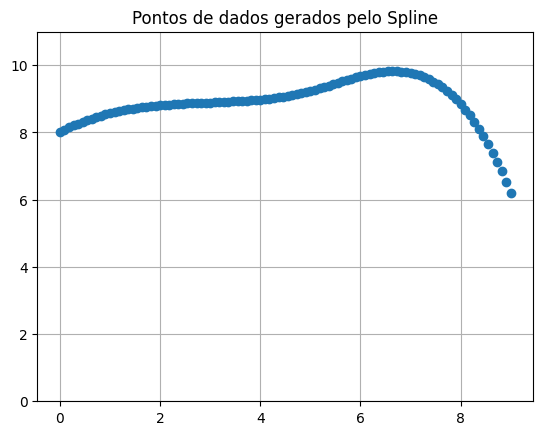

In [9]:
plt.title("Pontos de dados gerados pelo Spline")
plt.plot(x_new, y_fit, 'o')
plt.ylim((0, 11))
plt.grid()
plt.show()

Comparando com os dados originais:

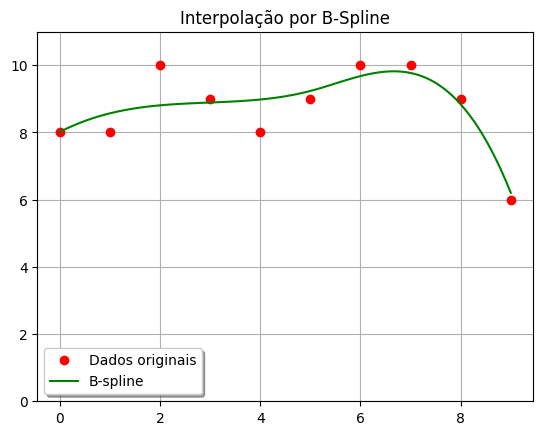

In [10]:
plt.title("Interpolação por B-Spline")
plt.plot(x, y, 'ro', label="Dados originais")
plt.plot(x_new, y_fit, '-g', label="B-spline")
plt.ylim((0, 11))
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

#### Obtendo um valor específico no spline.

Vamos supor que queremos descobrir o valor interpolado pelo spline quando `x = 7.5`.

Para fazermos isto, basta passar o x que queremos para nosso spline criado:

In [11]:
x_val = 7.5

print(spline(x_val))

9.47524695155794
